## Question

Today I woke up and my shares of the ETF iShares Blockchain Technology had gone up by 10%. 
Now I am tempted to sell them and take the profit, then buy again when the price goes down.
Every basic course of personal finance teaches that this is a bad idea, because it is impossible to predict the future.

But I am like Tommaso and I do not believe to something until I put my nose in it.
So I decided to write a program that simulates the price of the ETF for the next `n` days, and then I will run it for a large number of times to see if I can make a profit.
Actually nope, the last sentence was just an inspiring copilot suggestion. I am not going to try predictions, too long. I will just look at the past, and see what happened to take a decision today (wise!).

How to do that?
Let us make this simulation: 
1) we compute the return if one buyed the ETF at the start and sold it today.
2) we compute the return if one buyed the ETF at the start and sold it each time time the price went up by 10%, buying it again only if it dropped 5% with respect to the lasts sell value.


### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import yfinance as yf
import justetf_scraping

### Get Data

In [15]:
ISIN = 'IE000RDRMSD1'
overview = justetf_scraping.load_overview()

overview = overview.loc[ISIN]
data = justetf_scraping.load_chart(ISIN)

/home/lorenzos/miniconda3/lib/python3.12/site-packages/justetf_scraping/overview.py:397: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Yes": True, "No": False}).astype("bool")
/home/lorenzos/miniconda3/lib/python3.12/site-packages/justetf_scraping/overview.py:397: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Yes": True, "No": False}).astype("bool")


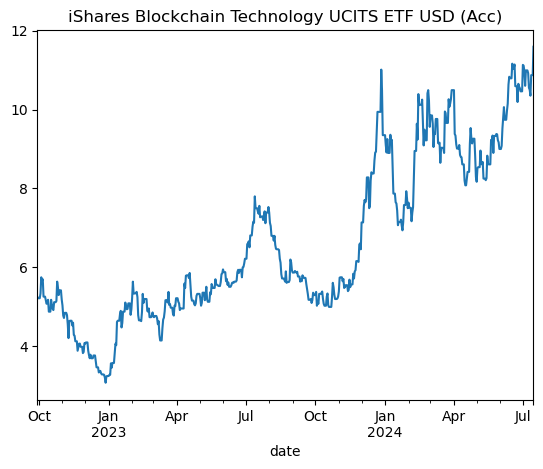

In [31]:
fig, ax = plt.subplots()
data['quote'].plot(ax=ax)
ax.set_title(overview['name'])
plt.show()

### Simulate

In [36]:
quotes = data['quote'].values

In [37]:
print("Profit with buy and hold strategy:")
print((quotes[-1] - quotes[0])/quotes[0] * 100)

Profit with buy and hold strategy:
120.76190476190476


In [47]:
up_to_sell = 10 # Percentage
down_to_buy = -5 # Percentage

initial_money = 100 
final_money = initial_money

days = 0
last_buy_quote = quotes[0]
last_sell_quote = 0.
holding = True

for i, quote in tqdm(enumerate(quotes)):
    days += 1
    if holding:
        if (quote - last_buy_quote) / last_buy_quote * 100 > up_to_sell:
            final_money += final_money * (quote - last_buy_quote) / last_buy_quote
            holding = False
            last_sell_quote = quote
            print(f'Sell at {quote:.2f} after {days} days ({data.index[i].day}/{data.index[i].month}/{data.index[i].year})')
            days = 0
    else:
        if (quote - last_sell_quote) / last_sell_quote * 100 < down_to_buy:
            holding = True
            last_buy_quote = quote
            print(f'Buy at {quote:.2f} after {days} days ({data.index[i].day}/{data.index[i].month}/{data.index[i].year})')
            days = 0

print(f'Final money: {final_money:.2f}', 'profit:', final_money - initial_money, 'Hold:', holding)

656it [00:00, 1753641.44it/s]

Sell at 5.79 after 197 days (13/4/2023)
Buy at 5.26 after 7 days (20/4/2023)
Sell at 5.83 after 40 days (30/5/2023)
Buy at 5.51 after 10 days (9/6/2023)
Sell at 6.10 after 20 days (29/6/2023)
Buy at 5.72 after 50 days (18/8/2023)
Sell at 6.58 after 102 days (28/11/2023)
Final money: 155.67 profit: 55.67188058193008 Hold: False


In [ ]:
# Parameters:
up_to_sell = 10 # Percentage
down_to_buy = -5 # Percentage

num_days = (df.index[-1]-df.index[0]).days
num_recorded_days = len(df)
recorded_days_per_year = 365*(num_recorded_days / num_days)
recorded_days_holding = int(recorded_days_per_year*years_holding)

num_periods = len(df) - recorded_days_holding
results = []

for i in tqdm(range(num_periods)):

    period = df.index[i:i+recorded_days_holding]
    initial_buy_day = period[0]

    initial_investment_value = 100
    final_investment_value = initial_investment_value

    buy_days = [initial_buy_day,]
    buy_prices = [df['Price'].loc[initial_buy_day],]
    sell_days = []
    sell_prices = []

    last_buy_price = df['Price'].loc[initial_buy_day]
    last_sell_price = 0.
    holding = True

    for day in period[1:]:

        current_price = df['Price'].loc[day]
        
        if holding:
            current_return = (current_price - last_buy_price)/last_buy_price

            if current_return > R:
                sell_days.append(day)
                sell_prices.append(current_price)
                final_investment_value += final_investment_value*current_return
                last_sell_price = current_price
                holding = False

        else:
            current_variation = (current_price - last_sell_price)/last_sell_price

            if current_variation < L or (day - sell_days[-1]).days > Z:
                buy_days.append(day)
                buy_prices.append(current_price)

                last_buy_price = current_price
                holding = True
            

    total_return = (final_investment_value - initial_investment_value)/initial_investment_value
    yearly_return = (1 + total_return)**(1/years_holding) - 1
    yearly_return = yearly_return*100

    total_return_no_strategy = (df['Price'].loc[period[-1]] - df['Price'].loc[period[0]])/df['Price'].loc[period[0]]
    yearly_return_no_strategy = (1 + total_return_no_strategy)**(1/years_holding) - 1
    yearly_return_no_strategy = yearly_return_no_strategy*100

    results.append(
        {
            "initial_buy_day":initial_buy_day,
            "yearly_return":yearly_return,
            "yearly_return_no_strategy":yearly_return_no_strategy,
            "sell_days":sell_days,
            "sell_prices":sell_prices,
            "buy_days":buy_days,
            "buy_prices":buy_prices
        }
    )